Nombre
Carnet

## Preparations

In [ ]:
# ----- Libraries ----- #

# This is the main Library that allows us to work with Neural Networks
import tensorflow as tf

# For graph plotting
import matplotlib.pyplot as plt
from tensorflow.math import confusion_matrix

# For dataset manipulation
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# For visualizing more complex graphs
import seaborn as sns

# Global constant for training acceleration
AUTOTUNE = tf.data.AUTOTUNE

# Classification

## 1) Dataset Preparations

In [ ]:
'''
The dataset you are going to use is the following:
https://archive.ics.uci.edu/dataset/222/bank+marketing

'''

# Retrieve the dataset

df = pd.read_csv('bank-full.csv', sep=';')

print(df.head())

NameError: name 'pd' is not defined

In [ ]:
# Loading Dataset and have a glimpse about it
column_names = ['age','job','marital','educacion', 'default', 'balance', 'housing', 'loan', 'contact', "day", "month", "duration", "compaign", "pdays", "previous", "poutcome", "y"]

# /* YOUR CODE HERE */
# Hint: Make sure to check out the files first! And pay attention how data is separated
raw_dataset = pd.read_csv("bank-full.csv", names=column_names,
                      na_values = "?", comment='\t',
                      sep=";", skipinitialspace=True)
# Brief Statistical Summary of the dataset
raw_dataset.describe()

In [ ]:
# Lets check columns
raw_dataset.columns

In [ ]:
# Summary of the dataset
raw_dataset.head()

In [ ]:
# Returns a form of (# rows, # columns)
raw_dataset.shape

In [ ]:
# Lets make a copy
new_dataset = raw_dataset.copy()

# Lets check for null values
# df.dropna()
print(new_dataset.isna().sum())

# Dropping null rows
new_dataset = new_dataset.dropna()

# Checking new dataset
new_dataset.head()

In [ ]:
new_dataset[['balance']]

In [ ]:
new_dataset.columns

In [ ]:
# Estandariza los nombres de columnas
new_dataset.columns = new_dataset.columns.str.strip().str.lower()

# Ahora revisa los nombres
print(new_dataset.columns.tolist())


In [ ]:
print(new_dataset[numerical_columns].dtypes)


In [ ]:
new_dataset['balance'] = pd.to_numeric(new_dataset['balance'], errors='coerce')


In [ ]:
new_dataset['age'] = pd.to_numeric(new_dataset['age'], errors='coerce')


In [ ]:
new_dataset['day'] = pd.to_numeric(new_dataset['day'], errors='coerce')


In [ ]:
new_dataset['duration'] = pd.to_numeric(new_dataset['duration'], errors='coerce')


In [ ]:
numerical_columns = ['age', 'balance', 'day', 'duration']
sns.pairplot(new_dataset[numerical_columns], diag_kind="kde")


In [ ]:
# Splitting dataset into training and testing
train, test = train_test_split(new_dataset, test_size=0.2)

# Sepparating both sets into dependent and independent variables

# /* REPLACE 'None' WITH CODE YOUR CODE */
# Hint: Make sure you select only numerical variables.
# Feel free to choose the number you want and the dependent variables is MPG
independent_variables = ['age', 'job', 'marital', 'educacion', 'default', 'balance',
                         'housing', 'loan', 'contact', 'day', 'month', 'duration',
                         'compaign', 'pdays', 'previous', 'poutcome']
dependent_variables = ['y']

train_set = train[independent_variables]
train_target = train[dependent_variables]

test_set = test[independent_variables]
test_target = test[dependent_variables]

In [ ]:
train_set, test_set

In [ ]:
train_target, test_target

In [ ]:
raw_dataset.columns

In [ ]:
columns_to_encode = ['job', 'marital', 'educacion', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'compaign', 'pdays']
train_set = pd.get_dummies(train_set, columns=columns_to_encode, dtype=int)
test_set = pd.get_dummies(test_set, columns=columns_to_encode, dtype=int)

In [ ]:
train_set_encoded = pd.get_dummies(train_set)
test_set_encoded = pd.get_dummies(test_set)

# Asegúrate que ambas tengan las mismas columnas:
train_set_encoded, test_set_encoded = train_set_encoded.align(test_set_encoded, join='left', axis=1, fill_value=0)


In [ ]:
train_target = pd.factorize(train['y'])[0]
test_target = pd.factorize(test['y'])[0]


In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
# NNs can't understand strings, we have to ENCODE them! (more next class)
train_target = pd.factorize(train_target['y'])[0]
test_target = pd.factorize(test_target['y'])[0]


In [ ]:
print(new_dataset["y"].dtypes)


## 2) NN for Classification

In [ ]:
train_set_encoded = pd.get_dummies(train_set)
test_set_encoded = pd.get_dummies(test_set)

# Asegúrate que ambas tengan las mismas columnas:
train_set_encoded, test_set_encoded = train_set_encoded.align(test_set_encoded, join='left', axis=1, fill_value=0)


In [ ]:
train_set.dtypes

# MODELO #1

In [ ]:
# NNs can't understand strings, we have to ENCODE them! (more next class)
# Get unique classes and their count
# Ensure train_target is a numpy array or pandas Series containing numerical labels
# If train_target is still a DataFrame, this line will cause an error:
# unique_classes = train_target['y'].unique()

# We need the number of unique classes from the factorized target variable
num_classes = len(np.unique(train_target))


# Update model architecture with the correct number of output units
model = tf.keras.models.Sequential([
    # Update the input shape to reflect the number of features AFTER encoding
    # You'll need to determine the final number of columns after one-hot encoding.
    # For now, let's use the number of columns in the encoded train_set.
    tf.keras.layers.InputLayer(input_shape=(train_set_encoded.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax') # Change output units
])

# Now lets compile the model. NOTE: These are the finishing touches before having a fully functional model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

# Factorize train_target and test_target to numerical labels
# This part was already done in a previous cell, so commenting it out
# train_target = pd.factorize(train_target['y'])[0]
# test_target = pd.factorize(test_target['y'])[0]

# Use the one-hot encoded datasets for training
model.fit(train_set_encoded,
          train_target,
          epochs=25,
          batch_size = 128,
          validation_split=0.2
        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5937 - loss: 7.5314 - val_accuracy: 0.8861 - val_loss: nan
Epoch 2/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8867 - loss: 0.3035 - val_accuracy: 0.8857 - val_loss: nan
Epoch 3/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8870 - loss: 0.2736 - val_accuracy: 0.8902 - val_loss: nan
Epoch 4/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8910 - loss: 0.2577 - val_accuracy: 0.8974 - val_loss: nan
Epoch 5/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9014 - loss: 0.2313 - val_accuracy: 0.8739 - val_loss: nan
Epoch 6/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9010 - loss: 0.2417 - val_accuracy: 0.8890 - val_loss: nan
Epoch 7/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8938 - loss: 0.2453 - val_accuracy: 0.9007 - val_loss: nan
Epoch 8/25
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9023 - loss: 0.2258 - val_accuracy: 0.9003 - val_loss: nan


In [ ]:
# Evaluate your model
# Use the one-hot encoded test set for evaluation
model.evaluate(x=test_set_encoded, y=test_target, batch_size=128)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8897 - loss: 0.2515


[0.26053375005722046, 0.8804600238800049]

# MODELO #2

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_set_encoded.shape[1],)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model2.fit(train_set_encoded,
          train_target,
          epochs=30,
          batch_size = 128,
          validation_split=0.2
        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8533 - loss: 0.5195 - val_accuracy: 0.8843 - val_loss: nan
Epoch 2/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8861 - loss: 0.3069 - val_accuracy: 0.8869 - val_loss: nan
Epoch 3/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8900 - loss: 0.2756 - val_accuracy: 0.8956 - val_loss: nan
Epoch 4/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8928 - loss: 0.2575 - val_accuracy: 0.8916 - val_loss: nan
Epoch 5/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8970 - loss: 0.2394 - val_accuracy: 0.8977 - val_loss: nan
Epoch 6/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8944 - loss: 0.2541 - val_accuracy: 0.8948 - val_loss: nan
Epoch 7/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8997 - loss: 0.2370 - val_accuracy: 0.9001 - val_loss: nan
Epoch 8/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9049 - loss: 0.2210 - val_accuracy: 0.8972 - val_loss: 

In [ ]:
model2.evaluate(x=test_set_encoded, y=test_target, batch_size=128)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8870 - loss: 0.2675


[0.28939536213874817, 0.8775848746299744]

# MODELO #3

In [ ]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_set_encoded.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=num_classes, activation='softmax')
])

model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model3.fit(train_set_encoded,
          train_target,
          epochs=50,
          batch_size = 64,
          validation_split=0.2
        )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8317 - loss: 0.7642 - val_accuracy: 0.8865 - val_loss: nan
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8838 - loss: 0.3201 - val_accuracy: 0.8913 - val_loss: nan
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8920 - loss: 0.2662 - val_accuracy: 0.8821 - val_loss: nan
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8944 - loss: 0.2532 - val_accuracy: 0.8999 - val_loss: nan
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8959 - loss: 0.2484 - val_accuracy: 0.8890 - val_loss: nan
Epoch 6/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8980 - loss: 0.2385 - val_accuracy: 0.8920 - val_loss: nan
Epoch 7/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9022 - loss: 0.2312 - val_accuracy: 0.8984 - val_loss: nan
Epoch 8/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9037 - loss: 0.2261 - val_accuracy: 0.8956 - val_loss: nan

In [ ]:
model2.evaluate(x=test_set_encoded, y=test_target, batch_size=64)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8871 - loss: 0.2670


[0.2893954813480377, 0.8775848746299744]

# Conclusiones

After you are done with both previous models, make 3 different models for the regression problem and 3 for the classification problem.

Annotate the results in a Text Cell below this one (only the metrics shown in the evaluation phase) and then write a conclusion which model was the best for each problem.

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


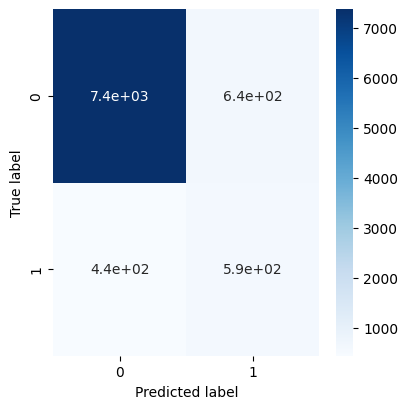

In [ ]:
# Function that plots confusion matrix
def plot_confusion_matrix(labels, predictions):
  figure = plt.figure(figsize=(4, 4))
  sns.heatmap(confusion_matrix(labels=labels, predictions=predictions), annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

# Confusion Matrix
# Use the one-hot encoded test set for prediction
predictions = list(map(lambda x: np.argmax(x), model.predict(test_set_encoded)))

plot_confusion_matrix(labels=test_target, predictions=predictions)

# READ ME

When you are finished with your laboratory, remember to share it. Make the URL public for Galileo.edu domain or for everyone.
Also, remember to hit Ctrl+S to save your progress.